In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sn

import americangut.notebook_environment as agenv
import americangut.util as agu

/Users/jwdebelius/anaconda/envs/americangut/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

In [3]:
agp_map_fp = agu.get_existing_path(agenv.paths['meta']['ag-cleaned-md'])
hmp_map_fp = agu.get_existing_path(agenv.paths['meta']['hmp-cleaned-md'])
obs_otus_fp = agu.get_existing_path(agenv.paths['alpha']['1k']['ag-pgp-hmp-gg-100nt-observedotus'])
pd_fp = agu.get_existing_path(agenv.paths['alpha']['1k']['ag-pgp-hmp-gg-100nt-pd'])

In [4]:
agp_map = pd.read_csv(agp_map_fp, sep='\t', dtype=str, na_values=['unknown', 'no_data'])
agp_map.set_index('#SampleID', inplace=True)

hmp_map = pd.read_csv(hmp_map_fp, sep='\t', dtype=str, na_values=['unknown', 'no_data'])
hmp_map.set_index('#SampleID', inplace=True)

obs_otus = pd.read_csv(obs_otus_fp, sep='\t').mean(0)
obs_otus.name = 'observed_otus'

faith_pd = pd.read_csv(pd_fp, sep='\t').mean(0)
faith_pd.name = 'PD_whole_tree'

In [6]:
agp = agp_map[['SIMPLE_BODY_SITE']].join(obs_otus).join(faith_pd).dropna()
hmp = hmp_map[['SIMPLE_BODY_SITE']].join(obs_otus).join(faith_pd).dropna()

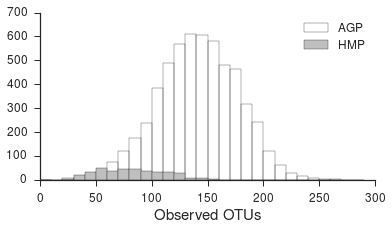

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(3, 1, 3)
ax1.hist(agp.loc[agp.SIMPLE_BODY_SITE == 'FECAL', 'observed_otus'].dropna(),
        bins=np.arange(0, 300, 10),
        facecolor='None',
        edgecolor='k',
        label='AGP',
        )
ax1.hist(hmp.loc[hmp.SIMPLE_BODY_SITE == 'FECAL', 'observed_otus'].dropna(),
        bins=np.arange(0, 300, 10),
        facecolor=[0.75, 0.75, 0.75],
        edgecolor='k',
        label='HMP',
        )

sn.despine()

ax1.set_xticklabels(map(int, ax.get_xticks()), size=12)
ax1.set_yticklabels(map(int, ax.get_yticks()), size=12)
ax1.set_xlabel('Observed OTUs', size=15)

ax1.legend(fontsize=12)

fig.set_size_inches((6, 3))
fig.savefig('/Users/jwdebelius/Desktop/AmericanGut_Figures/figure1/fecal_1k_obs_otus.pdf', dpi=300)

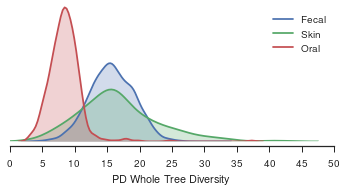

In [71]:
ax2 = plt.axes()
sn.kdeplot(
    agp.loc[agp.SIMPLE_BODY_SITE == 'FECAL', 'PD_whole_tree'],
    ax=ax2,
    shade=True,
    label='Fecal'
    )
sn.kdeplot(
    agp.loc[agp.SIMPLE_BODY_SITE == 'SKIN', 'PD_whole_tree'],
    ax=ax2,
    shade=True,
    label='Skin'
    )
sn.kdeplot(
    agp.loc[agp.SIMPLE_BODY_SITE == 'ORAL', 'PD_whole_tree'],
    ax=ax2,
    shade=True,
    label='Oral'
    )
ax2.set_yticks([])

ax2.set_xlim([0, 50])
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_xticklabels(np.arange(0, 51, 5), size=12)
ax2.set_xlabel('PD Whole Tree Diversity')
sn.despine(ax=ax2, top=True, left=True, right=True, offset=5)

ax2.figure.set_size_inches((6, 3))
ax2.set_position((0.125, 0.25, 0.75, 0.625))
ax2.figure.savefig('/Users/jwdebelius/Desktop/AmericanGut_Figures/figure1/PD_1k_by_bodysite.pdf', dpi=300)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

sn.distplot(
    agp.loc[agp.SIMPLE_BODY_SITE == 'FECAL', 'observed_otus'],
#     bins=np.arange(0, 51, 2.5),
    ax=ax1,
    norm_hist=False,
    hist=False,
    )
sn.distplot(agp.loc[agp.SIMPLE_BODY_SITE == 'SKIN', 'observed_otus'],
            ax=ax2,
#             bins=np.arange(0, 51, 2.5),
            hist=False)
sn.distplot(agp.loc[agp.SIMPLE_BODY_SITE == 'ORAL', 'observed_otus'],
            ax=ax3,
#             bins=np.arange(0, 51, 2.5),
            hist=False,
           )
ax1.set_xlim([0, 600])
ax2.set_xlim([0, 600])
ax3.set_xlim([0, 600])

ax1.set_yticks([-1])
ax2.set_yticks([-1])
ax3.set_yticks([-1])

sn.despine(ax=ax1, left=True, right=True, top=True)
sn.despine(ax=ax2, left=True, right=True, top=True)
sn.despine(ax=ax3, left=True, right=True, top=True)
# )
# sn.distplot()
# sn.distplot(agp_map.loc[agp_map['SIMPLE_BODY_SITE'] == 'FECAL',  'PD_whole_tree_1k'].values)

In [ ]:
help(sn.distplot)